In [2]:
import numpy as np 
import pandas as pd
from hmmlearn import hmm
from matplotlib import pyplot as plt
%matplotlib inline

# Exercise 1

In [3]:
filename = open("1990-201310日线.csv","rb")
# a = np.loadtxt(filename)
data  = pd.read_csv(filename)
filename.close()
data["Date"] = data["Date"].astype('<M8[ns]')
temp= data[data.Date>"2007-12-31"]
a = data["Date"].astype("<M8[ns]")


919.42999999999995

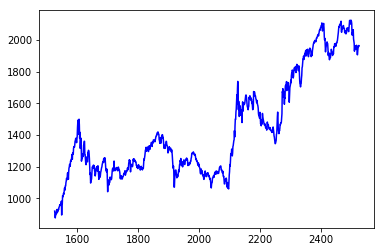

In [6]:

def get_price(filename,start_date,end_date):
    filename  = open("1990-201310日线.csv","rb")
    data = pd.read_csv(filename)
    data["Date"] = data["Date"].astype('<M8[ns]')
#     data = data[data.Name == name]
    tmp = data[data.Date > start_date]
    data2 = tmp[tmp.Date < end_date]
    return data2
a = get_price(filename,"1997-01-01","2005-12-31")
close_value = a["Close"]
dates =a["Date"].astype("<M8[ns]")
plt.plot(close_value[:1000],color="blue")
close_value = np.array(close_value)
dates = np.array(dates)
close_value[0]

# Exercise 2

In [7]:
diff = np.diff(close_value)
diff = diff.reshape(-1,1)
modelhmm = hmm.GaussianHMM(n_components=4)
modelhmm.fit(diff)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [8]:
modelhmm.startprob_

array([ 0.,  0.,  0.,  1.])

In [9]:
modelhmm.transmat_

array([[  9.86283260e-01,   3.87903157e-06,   1.05030111e-05,
          1.37023577e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  5.77448562e-03,   0.00000000e+00,   2.51651377e-01,
          7.42574137e-01],
       [  2.05273498e-01,   3.77387984e-45,   4.22045871e-02,
          7.52521915e-01]])

# Exercise 3

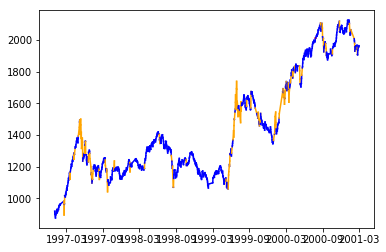

In [11]:
hidden_states = modelhmm.predict(diff)
colors=["red","green","orange","blue"]
fig2 = plt.figure()
for j in range(1000-1):
    for i in range(modelhmm.n_components):
        if hidden_states[j] == i:
          
            plt.plot([dates[j],dates[j+1]],[close_value[j],close_value[j+1]],color = colors[i])

plt.show()